We will start out by downloading data on the "s p 500" index then we'll clean the data up the data and use it to train a model then we'll do back testing to actually figure out how good our model is and we'll add in some more predictors to improve our accuracy.

A machine learning model that can predict tomorrow's "s p 500" index price given historical data and we'll also have back tested this model on 20 plus years of historical data so we can really be confident in the predictions that it's making.

## 1) Downloading S&P 500 Price Data

* And the first thing will do is we will import something called the "yfinance" package. This package calls the yahoo finance api to download daily stock and index prices.
* And we will initialize something called a ticker class which will enable us to download price history for a single symbol in this case we will use the gspc symbol which is the "s p 500" index. 
* And next we will go ahead and query the historical prices. So we will use the history method to pass in period equals max which will query all data from the very beginning when the index was created.
* In this dataframe each row is the price on a single trading day so non trading days are not included in this data.
* Columns are the opening price so the price when the market opened the highest price during the day.
* The lowest price during the day the closing price when the exhange closed
* The volume so the total volume that was traded that day.
* Essentially going to use this columns to predict if the stock price will go up or down tomorrow.
* we also have these additional columns dividends and stock splits but we are not going to use these and we'll actually remove them later

In [3]:
import yfinance as yf

In [4]:
sp500 = yf.Ticker("^GSPC")

In [5]:
sp500 = sp500.history(period="max")

In [6]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-04 00:00:00-04:00,5278.240234,5298.799805,5257.629883,5291.339844,3707900000,0.0,0.0
2024-06-05 00:00:00-04:00,5314.479980,5354.160156,5297.640137,5354.029785,3591460000,0.0,0.0
2024-06-06 00:00:00-04:00,5357.799805,5362.350098,5335.359863,5352.959961,3609990000,0.0,0.0


In [7]:
# We will take a look at the index of the "s p 500" dataframe
# And we can see we have a date time index and 
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-05-28 00:00:00-04:00', '2024-05-29 00:00:00-04:00',
               '2024-05-30 00:00:00-04:00', '2024-05-31 00:00:00-04:00',
               '2024-06-03 00:00:00-04:00', '2024-06-04 00:00:00-04:00',
               '2024-06-05 00:00:00-04:00', '2024-06-06 00:00:00-04:00',
               '2024-06-07 00:00:00-04:00', '2024-06-10 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24226, freq=None)

## 2) Cleaning and Visualizing our Stock Market Data

* So the first will do we will go ahead and plot the data in the data frame so we will plot the closing price against the index. So what this is doing is it's saying show the index which is really the trading days the dates on the X-axis and shows the closing price on the Y-axis
* Slight cleaning of the dataset we will just remove those extra columns that we dont need so we will remove the divident column and stock split column. These column are more appropriate for individual stocks not an index so we dont actually need them.

<AxesSubplot:xlabel='Date'>

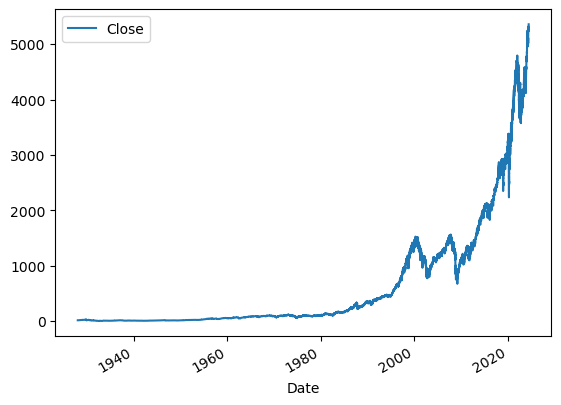

In [8]:
sp500.plot.line(y="Close", use_index=True) # This is the chart of the s p 500 price history

In [9]:
del sp500["Dividends"]
del sp500["Stock Splits"]

## 3) Setting up our Target for Machine Learning

* In this we are going to do the setup up our target so this is what we are actually going to be predicting using machine learning. So this target is going to be will the price go up or down tomorrow
* First we are going to create a column called tomorrow and basically what this column is going to be tomorrow price and we will use the pandas shift method to help use do this 

In [10]:
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [11]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-06-04 00:00:00-04:00,5278.240234,5298.799805,5257.629883,5291.339844,3707900000,5354.029785
2024-06-05 00:00:00-04:00,5314.479980,5354.160156,5297.640137,5354.029785,3591460000,5352.959961
2024-06-06 00:00:00-04:00,5357.799805,5362.350098,5335.359863,5352.959961,3609990000,5346.990234


In [12]:
# Based on tomorrow price we can now set up a target so the target is what we are going to try to predict with machine learning
# and all we need to do with the target is tomorrow's price greater than today's price
# This will basically return a boolean indicating if tomorrow price is greater than today price but we want to convert this to an integer so
# we can use this in machine learning so we are going to use the "as" type method and pass in integer
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [13]:
sp500
# 1 is when the price went up so that's when the tomorrow price is greater than today's price
# 0 is when the price went down
# And this is what we are going to predict.

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-06-04 00:00:00-04:00,5278.240234,5298.799805,5257.629883,5291.339844,3707900000,5354.029785,1
2024-06-05 00:00:00-04:00,5314.479980,5354.160156,5297.640137,5354.029785,3591460000,5352.959961,0
2024-06-06 00:00:00-04:00,5357.799805,5362.350098,5335.359863,5352.959961,3609990000,5346.990234,0


There is a lot of historical data in this dataframe and usually lot of historical data is great but with stock market data if you go back too far the market could have shifted fundamentally and some of that old data may not be as useful in making future prediction. So we are going to do is remove all data that came before 1990.

In [14]:
# We are going to use the pandas "loca" method and basically say only take the rows where the index is at least 1990 january 1st
sp500 = sp500.loc["1990-01-01":].copy()

In [15]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-06-04 00:00:00-04:00,5278.240234,5298.799805,5257.629883,5291.339844,3707900000,5354.029785,1
2024-06-05 00:00:00-04:00,5314.479980,5354.160156,5297.640137,5354.029785,3591460000,5352.959961,0
2024-06-06 00:00:00-04:00,5357.799805,5362.350098,5335.359863,5352.959961,3609990000,5346.990234,0


## 4) Training an Initial Machine learning model

* Now we will train our first machine learning model.
* In this we are going to use "Random Forest Classifier" So random forests work by training a bunch of individual decision trees with randomized parameters and then averaging the results from those decision trees so because of these process random forest are resistant to overfitting they can overfit but it's harder for them to overfit than it is for other models to overfit they also run relatively quickly and they can pick up the non linear tendencies in the data
* So we are going to initialize our model and we are going to pass in a few parameters so "n" estimator is the number of individual decision trees we want to train the higher this is generally the better your accuracy is up up to a limit. And we setting this to be 100
* "min samples" split help us to protect against overfitting decision tree have a tendency to overfit if they build the tree too deeply. The higher we set it the less accurate the model will be but the less it will overfit 
* Next we are going to set random state equal to 1. So a random forest as you may have guessed has some randomization built in so setting a random state means that if we run the same model twice the random number is going to generated will be in a predictable sequence each time using this random seed of one so if we rerun the model twice we will get the same results which helps if you are updating or improving your model and you want to make sure it's actually the model or the something you did that improved error versus just something random.
* We are going to split our data up into a train and test set now this is time series data and with time series data you can't use cross validation or you can but if you do then your result will look amazing when you are training and horrible in real world and the reason why if you use cross validation or another way to split up your training and test set that doesn't take the time series nature of the data into account you will be using future data to predict the past which you just can't do in the real world and will result in something called leakage where you are leaking information into the model
* So the way we are going to split this data set up is we are going to put all of the rows except the last hundred rows into the training set and we are going to put the last hundred rows into the test set
* And then we going to create a list with all of the columns that we are going to use to predict the target. So in this we are going to close, volume, open, high, and low so those are going to be our predictors.
* And then we are going to fit the model "model.fit" train predictor so this using these predictor columns and then we are going to try to predict the target. 

In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

C:\Users\obaid\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


RandomForestClassifier(min_samples_split=100, random_state=1)

Next step is to measure how accurate the model is.
We are going to import precision score all the precision is it's saying when we said the market will go up
when the target was a 1 did it actually go up.
We are going to generate prediction using our model with the predict method and we will pass in our test set with the predictors. So that's going to generate the prediction. This prediction are in numpy array. So we are actually going to turn this into a pandas series and we are going to use the same index as our test data set.

In [17]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [18]:
preds

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
import pandas as pd
preds = pd.Series(preds, index=test.index)

In [20]:
preds

Date
2024-01-18 00:00:00-05:00    0
2024-01-19 00:00:00-05:00    0
2024-01-22 00:00:00-05:00    0
2024-01-23 00:00:00-05:00    0
2024-01-24 00:00:00-05:00    0
                            ..
2024-06-04 00:00:00-04:00    0
2024-06-05 00:00:00-04:00    0
2024-06-06 00:00:00-04:00    0
2024-06-07 00:00:00-04:00    0
2024-06-10 00:00:00-04:00    0
Length: 100, dtype: int32

We will calculate the precision score so will calculate the percentage and score using the actual target and the predicted target. And we can see the precision score is not very good it is "0"

In [21]:
precision_score(test["Target"], preds)

C:\Users\obaid\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.0

In [22]:
# plot our prediction in order to that we will combine our actual values with our predicted values
# And we will use the pandas "concat" function to do that.
# So we are concatenating our test target which is our actual values and our predicted values and then we are going to pass in axis equal to 1
# which mean treat each of these inputs as a column in our data set
combined = pd.concat([test["Target"], preds], axis=1)

<AxesSubplot:xlabel='Date'>

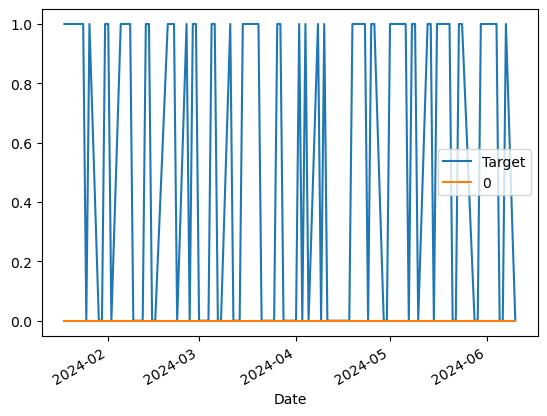

In [23]:
combined.plot()

So in this graph zero is our prediction and and blue line is what actually happened. As you can see that we haven't predicted the market would go up

## 5) Building a Backtesting System

* Next we are going to build a more robust way to test our algorithm.
* So currently we are only able to test against last 100 days but now we will test across multiple year of the dataset.
* So we are going to do something called back testing and in order to enable back testing the first thing we will do is create a prediction function and this will basically just wrap up everything we just did into one function. So its the fitting of the model using the training predictors and the target.

In [24]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

Now we will write a backtest function which takes in our "s p 500" data a machine learning model our predictors iit also takes in a start value which set to 2500 and a step value. So what is this start value? so whe backtest you want to have a certain amount of data to train your first model so every trading year has about 250 days so this is saying take 10 years of data and then train your first model with 10 years of data and the step is 250 which means that we will be training a model for about a year and then going to the next year and then going into the next year.

So what we are going to do is we are going to take the first 10 years of data and predict values for the 11th year. Then we will take the first 11 years of data predict values for the 12th year then we will take first 12 year of data and predict values for the 13th year and so on. and in this way we will actually get predictions for a lot of different years and be able to have more confidence in our model.

So in this backtest prediction we are going to create a list of all prediction and that will be a list where of data frames where each data frame is the predictions for a single year and then we are going to create a function to loop across our data year by year and make prediction for all of the years except the first 10 or so. 

In [25]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)

In [26]:
predictions = backtest(sp500, model, predictors)

In [27]:
predictions["Predictions"].value_counts()

0    3580
1    2596
Name: Predictions, dtype: int64

So we can see we predicted that the market would go down on about 3000 days and we predicted the market would go up on about 2000 days. And we can actually look at our precision score.

In [28]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

so across all of these rows these about 6000 or so trading days we were about 52% accurate precise so when we said the market would go up it went up 52% of the time. As benchmark what we can look at is the percentage of the days where the market actually went up and to do that we can look at the value counts of the target divided by the number of rows total and this will give us the percentage.

In [29]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.534812
0    0.465188
Name: Target, dtype: float64

So the "s p 500" in the days we were looking at actually went up 53.4% of days and went down to 46.5% of days. So if we all had done was just wake up every day and say i am gonna buy and sell at the end of the days we would actually have been better off than using this algorithm. This algorihtm performed a little bit worse than just the natural percentage of days that the stock market went up.

## 6) Adding Additional Predictors to our Model

* So now will do is add some more predictors to our model and see if that improves our accuracy.
* So we are going to create a variety of rolling averages
* So what these horizon are horizon on which we want to look at rolling means. So we will claculate the mean close price in the last two days the last trading week which is five days the last three month or so which is 60 trading days the last year and last four years and then we will find the ratio between today's closing price and the closing price in those periods which will help us know if is the market gone up a ton because if so it may be due for a downtum has the market gone down a ton if so it may be due for an upswing.
* And then we are going to create a list called new predictors which will hold some of the new columns that we are going to create
* So we are going to loop through these horizons and then we are going to calculate a rolling average

In [33]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors += [ratio_column, trend_column]

In [34]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-04 00:00:00-04:00,5278.240234,5298.799805,5257.629883,5291.339844,3707900000,5354.029785,1,1.000751,2.0,1.003871,3.0,1.021154,32.0,1.121890,140.0,1.260941,531.0
2024-06-05 00:00:00-04:00,5314.479980,5354.160156,5297.640137,5354.029785,3591460000,5352.959961,0,1.005889,2.0,1.012419,4.0,1.032468,33.0,1.134136,141.0,1.275185,531.0
2024-06-06 00:00:00-04:00,5357.799805,5362.350098,5335.359863,5352.959961,3609990000,5346.990234,0,0.999900,1.0,1.007740,4.0,1.031673,32.0,1.132893,140.0,1.274254,530.0


Here we can see a lot of NaN. So when the pandas cannot find enough days or enough rows prior to the current row to actually compute a rolling average it will just return NaN. 

In [35]:
sp500 = sp500.dropna()

In [36]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-03 00:00:00-04:00,5297.149902,5302.109863,5234.319824,5283.399902,4046920000,5291.339844,1,1.000558,2.0,1.001806,3.0,1.020172,31.0,1.121164,140.0,1.259724,531.0
2024-06-04 00:00:00-04:00,5278.240234,5298.799805,5257.629883,5291.339844,3707900000,5354.029785,1,1.000751,2.0,1.003871,3.0,1.021154,32.0,1.121890,140.0,1.260941,531.0
2024-06-05 00:00:00-04:00,5314.479980,5354.160156,5297.640137,5354.029785,3591460000,5352.959961,0,1.005889,2.0,1.012419,4.0,1.032468,33.0,1.134136,141.0,1.275185,531.0


## 7) Improving our model

* So let's update our model slightly and change some of our parameters.
* so we will increase our number of estimator to 200 and we will reduce our min sample split to 50.
* In this we are predict proba method and what this will return is actually a probability that the row will be zero or one.
* So to return the probability that the stock price will go down tomorrow and the probability of the stock price will go up tomorrow.
* So what we can do is just get the second column of this which will be the probability the stock price goes up.
* Then we have to set our custom threshold so by default the threshold is 0.5 so if there's greater than a 50 chance that the price will go up the model will return that the price will go up. We are going to set that threshold to 60 so this means that the model has to be more confident the price will go up in order to actually show that the price will go up. And what this will do will reduce the total number of trading days so it will reduce the number of days that it predicts the price will go up but it will increase the chance that the price will actually go up on those days which fits really well with what we want right.

In [37]:
model = RandomForestClassifier(n_estimators=200,
                               min_samples_split=50,
                               random_state=1)

In [47]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    
# Print whether the stock is going up or down
    for idx, row in combined.iterrows():
        if row["Predictions"] == 1:
            print(f"Stock at index {idx} is predicted to go up.")
        else:
            print(f"Stock at index {idx} is predicted to go down.")
    return combined


In [48]:
predictions = backtest(sp500, model, new_predictors)

Stock at index 2003-11-14 00:00:00-05:00 is predicted to go down.
Stock at index 2003-11-17 00:00:00-05:00 is predicted to go up.
Stock at index 2003-11-18 00:00:00-05:00 is predicted to go up.
Stock at index 2003-11-19 00:00:00-05:00 is predicted to go down.
Stock at index 2003-11-20 00:00:00-05:00 is predicted to go up.
Stock at index 2003-11-21 00:00:00-05:00 is predicted to go down.
Stock at index 2003-11-24 00:00:00-05:00 is predicted to go down.
Stock at index 2003-11-25 00:00:00-05:00 is predicted to go down.
Stock at index 2003-11-26 00:00:00-05:00 is predicted to go down.
Stock at index 2003-11-28 00:00:00-05:00 is predicted to go down.
Stock at index 2003-12-01 00:00:00-05:00 is predicted to go down.
Stock at index 2003-12-02 00:00:00-05:00 is predicted to go down.
Stock at index 2003-12-03 00:00:00-05:00 is predicted to go down.
Stock at index 2003-12-04 00:00:00-05:00 is predicted to go down.
Stock at index 2003-12-05 00:00:00-05:00 is predicted to go down.
Stock at index 2

In [40]:
predictions["Predictions"].value_counts()

0.0    4340
1.0     835
Name: Predictions, dtype: int64

The distribution is very different now you can see that there's only a few days that we have predicted the price would go up. And that's because we changed this threshold.

In [41]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5736526946107784

we can see that when we buy a stock so when the model predicts that the price will go up 57% of the time it will actually go up so this may not seem great right 57% is a failing grade in most places but it's actually pretty good especially given that we are just looking at time series data and we are just looking at historical prices of the index.  

In [55]:
def predict_tomorrow(train, latest_data, predictors, model):
    model.fit(train[predictors], train["Target"])
    tomorrow_pred_proba = model.predict_proba(latest_data[predictors])[:,1]
    tomorrow_pred = 1 if tomorrow_pred_proba >= .6 else 0
    
    if tomorrow_pred == 1:
        print("The stock is predicted to go up tomorrow.")
    else:
        print("The stock is predicted to go down tomorrow.")
    
    return tomorrow_pred

In [60]:
# Splitting the data into training and testing sets
train = sp500.iloc[:-1]  # Use all data except the last row for training
latest_data = sp500.iloc[-1:]  # Use the last row for prediction

In [61]:
# Predict tomorrow's stock movement
predict_tomorrow(train, latest_data, new_predictors, model)

The stock is predicted to go up tomorrow.


1